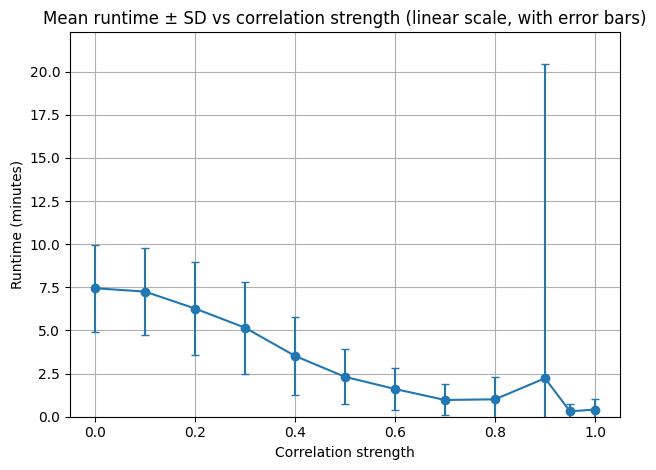

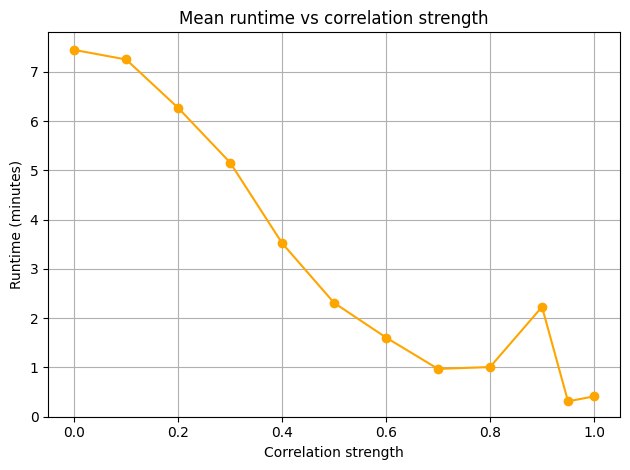

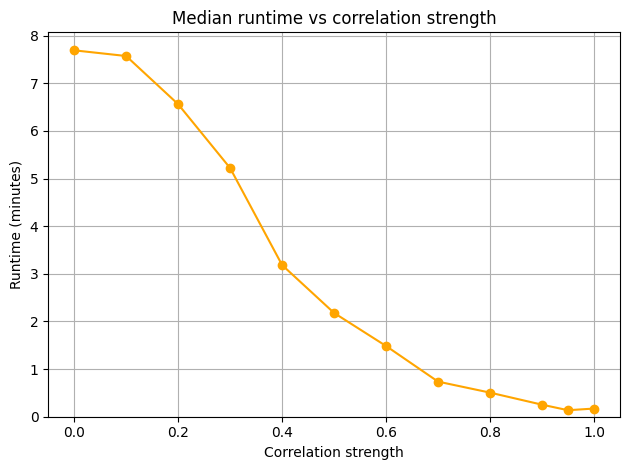

In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt

# This file contains the data (runtimes) for correlated valuations,
# with n=15 agents and m = 52 items. The data contains the mean, the standard deviation,
# and the median taken over 100 random instances for each correlation strength (the
# correlation strength goes from 0 to 1 in steps of 0.1).

# ====== Hardcoded data (seconds) ======
CORRELATION = [0.00, 0.10, 0.20, 0.30, 0.40,
               0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 1.00]
MEAN_SEC = [446.83, 435.16, 376.23, 309.64, 211.43, 138.72, 96.46, 58.25, 60.52, 133.79, 18.75, 24.79]
SD_SEC = [151.79, 152.13, 160.83, 159.77, 134.80, 95.93, 73.91, 53.93, 78.80, 1093.61, 26.64, 38.23]
MEDIAN_SEC = [461.51, 454.35, 393.66, 313.25, 191.05, 130.71, 89.08, 44.21, 30.35, 15.16, 8.20, 10.28]

# ====== Settings ======
OUTPUT_UNITS = "minutes"   # change to "seconds" if preferred
SHOW_NO_ERROR_PLOT = True  # also output mean-only (no error bars)

def to_units(arr, units):
    arr = np.array(arr, dtype=float)
    return arr / 60.0 if units == "minutes" else arr

def main():
    x = np.array(CORRELATION, dtype=float)
    mean_vals = to_units(MEAN_SEC, OUTPUT_UNITS)
    sd_vals = to_units(SD_SEC, OUTPUT_UNITS)
    median_vals = to_units(MEDIAN_SEC, OUTPUT_UNITS)

    # Plot 1: Mean ± SD with symmetric error bars on a linear axis
    plt.figure()
    plt.errorbar(x, mean_vals, yerr=sd_vals, fmt='o-', capsize=3)
    plt.xlabel('Correlation strength')
    plt.ylabel(f'Runtime ({OUTPUT_UNITS})')
    plt.title('Mean runtime ± SD vs correlation strength (linear scale, with error bars)')
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.savefig('runtime_mean_sd_linear.png', dpi=200)

    # Optional: Mean without error bars
    if SHOW_NO_ERROR_PLOT:
        plt.figure()
        plt.plot(x, mean_vals, marker='o', color="orange")
        plt.xlabel('Correlation strength')
        plt.ylabel(f'Runtime ({OUTPUT_UNITS})')
        plt.title('Mean runtime vs correlation strength')
        plt.grid(True)
        plt.ylim(bottom=0)
        plt.tight_layout()
        plt.savefig('runtime_mean_noerr_linear.png', dpi=200)

    # Plot 2: Median
    plt.figure()
    plt.plot(x, median_vals, marker='o', color="orange")
    plt.xlabel('Correlation strength')
    plt.ylabel(f'Runtime ({OUTPUT_UNITS})')
    plt.title('Median runtime vs correlation strength')
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.savefig('runtime_median_linear.png', dpi=200)

    plt.show()

if __name__ == "__main__":
    main()
